# K-means clustering to find best spots for Taxi Stations
by Bakyt Niyazov

### *Imports section*

In [4]:
import json

import foursquare as fq
from bs4 import BeautifulSoup 
#from bs4 import BeautifulSoup 
import folium

from geopy.geocoders import Nominatim

import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
#import requests 

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


import random # library for random number generation
import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 

### *Data and configs*

In [5]:
FQ_CLIENT_ID = 'VD1V4UB3C1X34U03PLBJDBGU3DDR0KD4JKGIO1KOFGTQBOEN'     # your Foursquare ID
FQ_CLIENT_SECRET = 'DWI2ADBODCA2FSIIYCMLX1YAFQJUSKCCU5NZDLDU5XFJFKVX' # your Foursquare Secret
FQ_VERSION = '20180605' # Foursquare API version

In [6]:
fqclient = fq.Foursquare(client_id=FQ_CLIENT_ID, client_secret=FQ_CLIENT_SECRET, version=FQ_VERSION)

In [7]:
cats = ['restaurant', 'cafe', 'club', 'hospital', 'hotel']

### *Functions section*

In [8]:
def get_geo_coords(address):
    geolocator = Nominatim(user_agent="DS_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    print('The geograpical coordinate of {} are {}, {}.'.format(address, latitude, longitude))
    
    return [latitude, longitude]

# citygeo = get_geo_coords('Bishkek, Kyrgyz Republic')
citygeo = [42.8767446, 74.6069949]

In [13]:
def venues_to_pd(venues):
    res = []
    for v in venues:
        res.append([v['name'], v['location']['lat'], v['location']['lng']])
    return pd.DataFrame(np.array(res).reshape(-1,3), columns = ['Name', 'Latitude', 'Longitude'])

In [28]:
def display_map(geo, df):
    fmap = folium.Map(location=[geo[0], geo[1]], zoom_start=10)
    for lat, lng, name in zip(df['Latitude'], df['Longitude'], df['Name']):
        label = folium.Popup(name, parse_html=False)
        folium.CircleMarker(
            [float(lat), float(lng)],
            radius=5,
            popup=label,
            color='blue',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7).add_to(fmap)
    return fmap

In [29]:
def extract_coords(venues):
    res = []
    for v in venues:
        res.append([ v['location']['lat'], v['location']['lng'] ])
    return res

# Display

In [17]:
venues = []
for c in cats:
    res = fqclient.venues.search(params={'query': c, 'll': str(citygeo[0]) + ',' + str(citygeo[1])})
    venues += res['venues']

df = venues_to_pd(venues)
df.head(25)

,Name,Latitude,Longitude
0,Nar Restaurant,42.872906,74.60279
1,12 Restaurant (Karaoke),42.86935358673143,74.60376582820709
2,Khan Tengri Restaurant,42.87985690655373,74.61096007247544
3,Special Business Restaurant,42.870773962682904,74.61115580265827
4,Bazilik Restaurant,42.879842,74.601226
5,City Cafe & Restaurant,42.836937016538656,74.56823535074147
6,Symphony Restaurant,42.868502237713926,74.60714042186737
7,Holiday Hotel Restaurant,42.8687744140625,74.61168670654297
8,FRUNZE,42.8790787740247,74.6068977848305
9,Captain Nemo Restaurant,42.87085928481484,74.59473931728543


In [19]:
fmap = display_map(citygeo, df)

In [21]:
fmap

# K-means Cluster

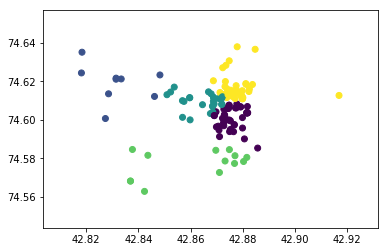

In [31]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans2, whiten

## TODO: At the moment I could not find better way to get clusters out of Geo coordinates.. 
# it's using Eucleudean distance but should use Haversine formula
coordinates= np.array(extract_coords(venues))
x, y = kmeans2(whiten(coordinates), 5, iter = 30)  
plt.scatter(coordinates[:,0], coordinates[:,1], c=y);
plt.show()

In [23]:
# TODO: get actual coordinates and show to the stakeholder

# Conclusion

In [ ]:
We place our to the centers